In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [310]:
## Personal Laptop Path
os.chdir('C:\\Users\\KASTU1\\Desktop\\Analytics Path\\Data\\Kaggle\\HousePricePrediction')
hp=pd.read_csv('house_pricing_kaggle.csv',sep='|')
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2000,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
1,2,2000,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
2,3,2000,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
3,4,2000,FV,NaN,4403,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,222000
4,5,2000,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500


In [ ]:
## Office Laptop Path
os.chdir('C:\\Users\\Prudhvi\\Desktop\Prudhvi\\Data Science\\Kaggle')
hp=pd.read_csv('house_pricing_kaggle.csv')
hp.head()

In [311]:
# Derving the columns
hp['YearBuilt']=2018-hp['YearBuilt']
hp['YearRemodAdd']=2018-hp['YearRemodAdd']

## Imputing missing with the intution on the dataset
hp['BsmtQual'].fillna(value='No Basement',inplace=True)
hp['BsmtCond'].fillna(value='No Basement',inplace=True)
hp['BsmtExposure'].fillna(value='No Basement',inplace=True)
hp['BsmtFinType1'].fillna(value='No Basement',inplace=True)
hp['BsmtFinType2'].fillna(value='No Basement',inplace=True)
hp['GarageType'].fillna(value='No Garage',inplace=True)
hp['GarageYrBlt'].fillna(value='9999',inplace=True)
hp['GarageFinish'].fillna(value='No Garage',inplace=True)
hp['GarageQual'].fillna(value='No Garage',inplace=True)
hp['GarageCond'].fillna(value='No Garage',inplace=True)
hp['FireplaceQu'].fillna(value='No FirePlace',inplace=True)
hp['MasVnrType'].fillna(value='None',inplace=True)
hp['MasVnrArea'].fillna(value=0,inplace=True)
hp['LotFrontage'].fillna(value=0,inplace=True)
hp['Electrical'].fillna(value='None',inplace=True)

In [312]:
## Function to find the dimensions which has only one unique column
def drop_column(x,dimensions):
    for i in dimensions:
        x.drop(i,axis=1, inplace=True)
        
#  Function to the dimension which contains only one unique values
def drop_unique(x):
    unique_dimensions=[]
    z=0
    for i in x.columns:
        if(x[i].nunique==1):
            x.drop(i,axis=1,inplace=True)
            z+=1
    print('Total # of columns which has only one record: ',z)

## Function to covert the data type of the columns
def datatypecoversion(coversion_list,x,datatype):
    for i in coversion_list:
        x[i]=x[i].astype(datatype)

## FUNCTION TO GET THE NUMERIC DATATYPE DIMENSIONS
def numeric_datatype(x):
    numeric_dimensions=[]
    for i in x.columns:
        if(x[i].dtype=='int64' or x[i].dtype=='float64'):
            numeric_dimensions.append(i) 
    return numeric_dimensions

def object_datatype(x):
    object_dimensions=[]
    for i in x.columns:
        if(x[i].dtype=='object'):
            object_dimensions.append(i) 
    return object_dimensions

## Function to Get the Dimension which dont have correlation between -0.5 to 0.5 with the Output Variable
## Prerequisite: Execute the numeric function before using this function

def correlation(x,numeric_dimensions,output_dim):
    deleted_correlation=[]
    for i in numeric_dimensions:
        if(i != output_dim):
            a=x[[i,output_dim]].corr()
            a.loc[i,output_dim]
            if((a.loc[i,output_dim]> -0.5) and (a.loc[i,output_dim]<0.5)):
                print('Correlation ',i,' vs', output_dim,':',a.loc[i,output_dim])
                hp.drop(i,axis=1,inplace=True)
                deleted_correlation.append(i)
    #return deleted_correlation
   # print('Dimensions which has high correlation with the ', output_dim,' variable are',x.select_dtypes(include=[x.number]).dtypes)


In [313]:
dimensions=['PoolQC','Fence','Alley','MiscFeature','Id','YrSold','YearBuilt','YearRemodAdd','Utilities','1stFlrSF','TotRmsAbvGrd']
## Calling drop_column function
drop_column(hp,dimensions)

# Calling drop unique function
drop_unique(hp)

## Calling datatypeconversion function
conversion_list=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath',
                 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars','MoSold']
datatypecoversion(conversion_list,hp,'object')

# Calling Numeric_dimensions function
numeric_dimensions=numeric_datatype(hp)
# Calling correlation function
correlation(hp,numeric_dimensions,'SalePrice')

Total # of columns which has only one record:  0
Correlation  MSSubClass  vs SalePrice : 0.04067252336293253
Correlation  LotFrontage  vs SalePrice : 0.20962394479948337
Correlation  LotArea  vs SalePrice : 0.2638433538714059
Correlation  MasVnrArea  vs SalePrice : 0.47261449900457736
Correlation  BsmtFinSF1  vs SalePrice : 0.3864198062421564
Correlation  BsmtFinSF2  vs SalePrice : -0.011378121450215243
Correlation  BsmtUnfSF  vs SalePrice : 0.21447910554696822
Correlation  2ndFlrSF  vs SalePrice : 0.319333802832067
Correlation  LowQualFinSF  vs SalePrice : -0.025606130000679714
Correlation  WoodDeckSF  vs SalePrice : 0.3244134445681318
Correlation  OpenPorchSF  vs SalePrice : 0.3158562271160555
Correlation  EnclosedPorch  vs SalePrice : -0.12857795792595622
Correlation  3SsnPorch  vs SalePrice : 0.04458366533574719
Correlation  ScreenPorch  vs SalePrice : 0.1114465711429115
Correlation  PoolArea  vs SalePrice : 0.09240354949187297
Correlation  MiscVal  vs SalePrice : -0.02118957964030

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition']


C:\Users\KASTU1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


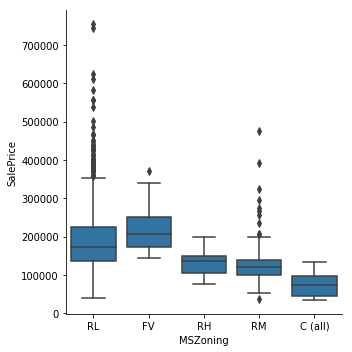

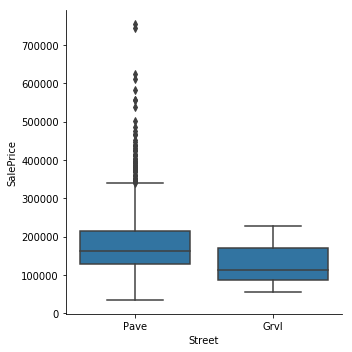

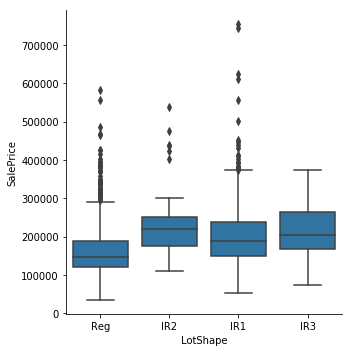

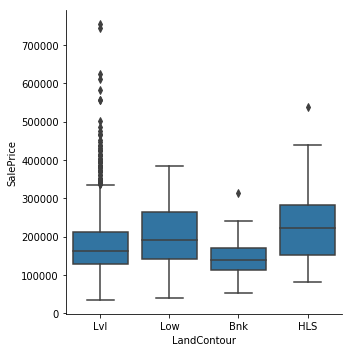

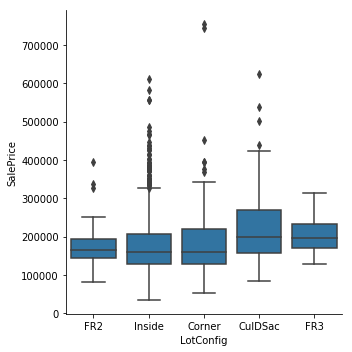

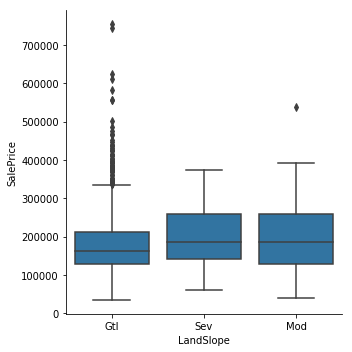

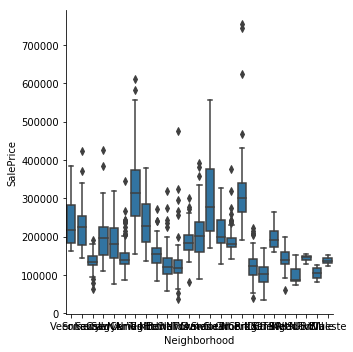

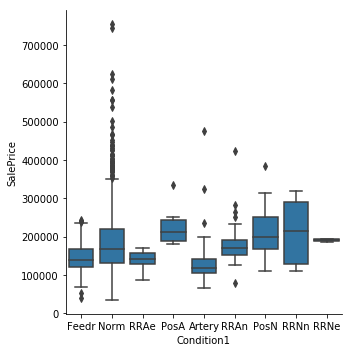

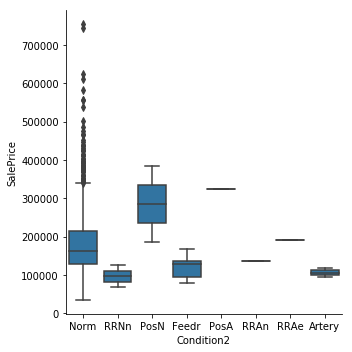

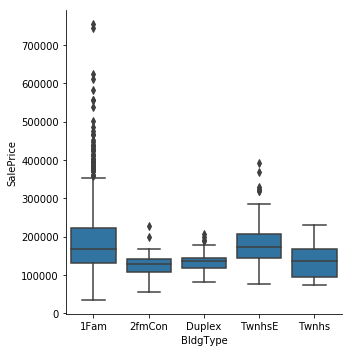

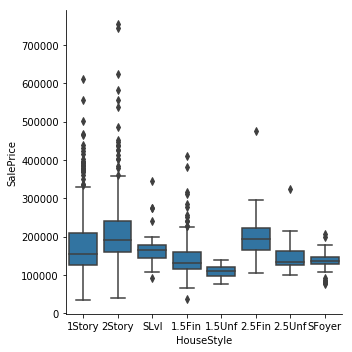

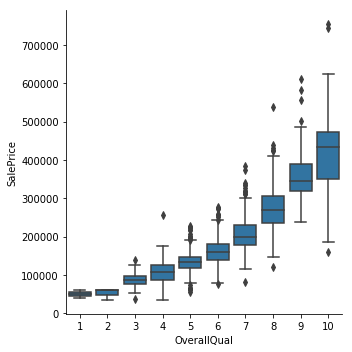

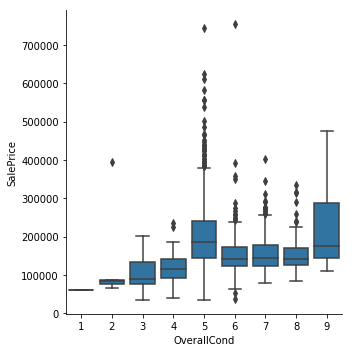

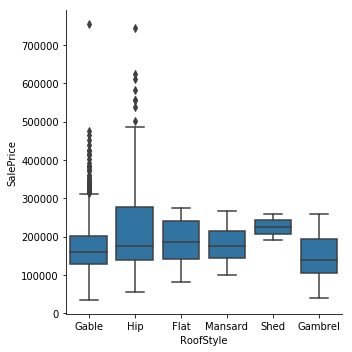

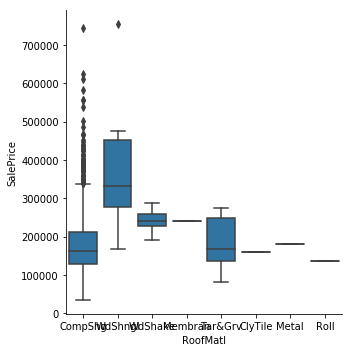

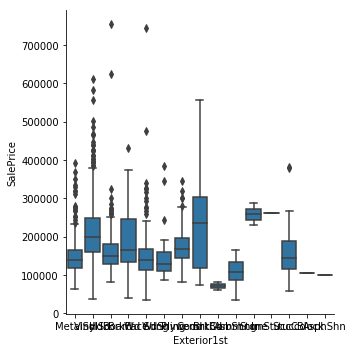

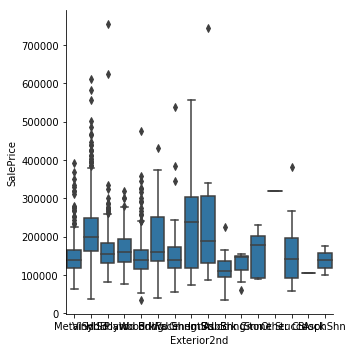

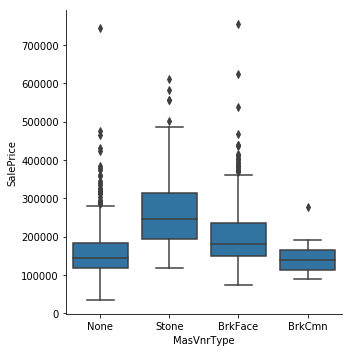

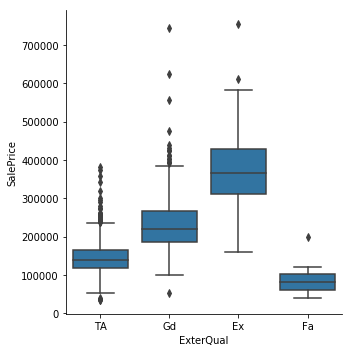

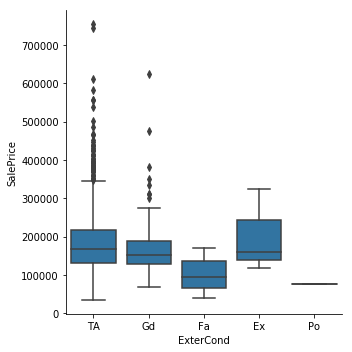

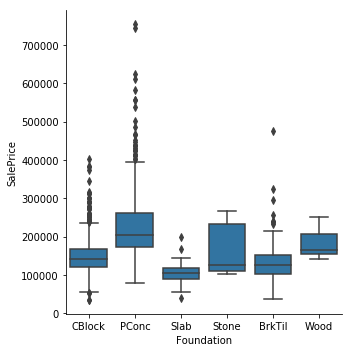

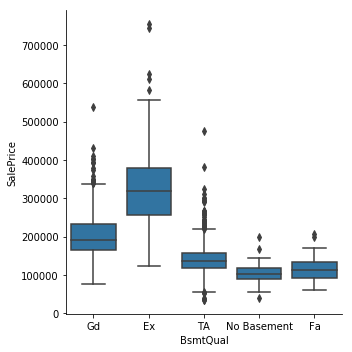

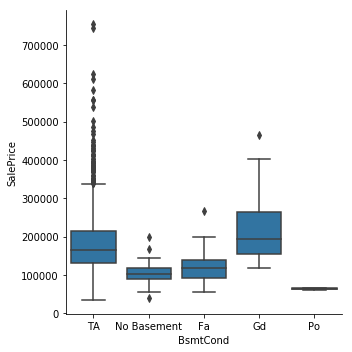

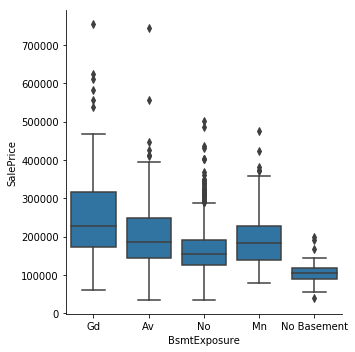

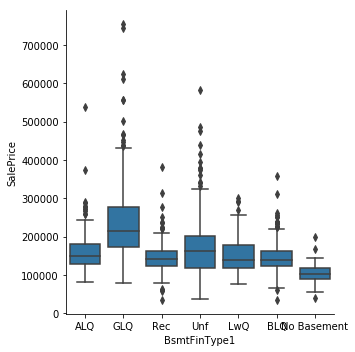

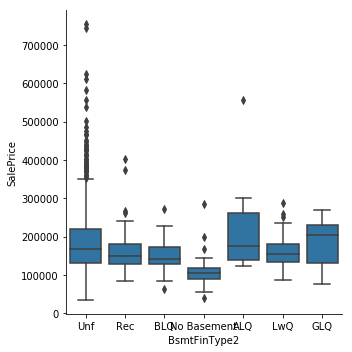

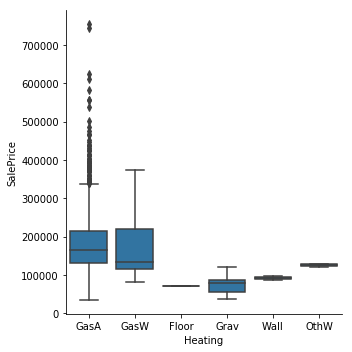

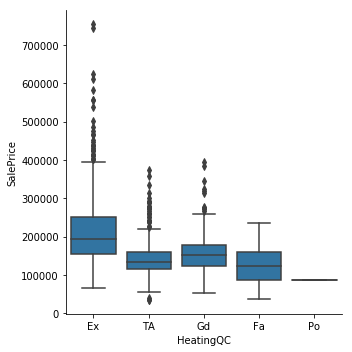

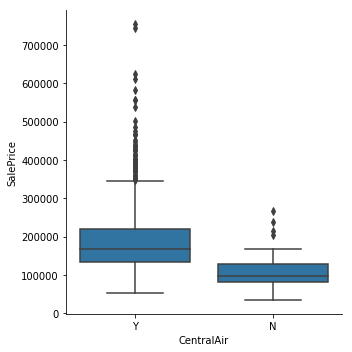

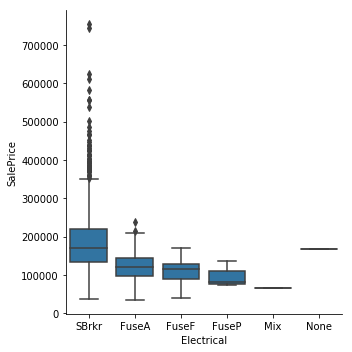

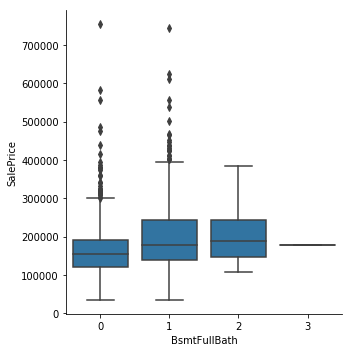

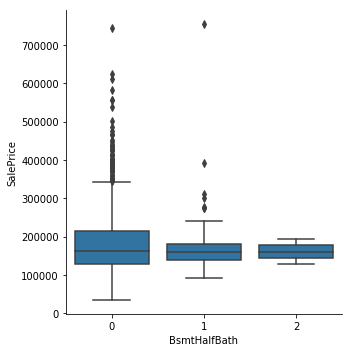

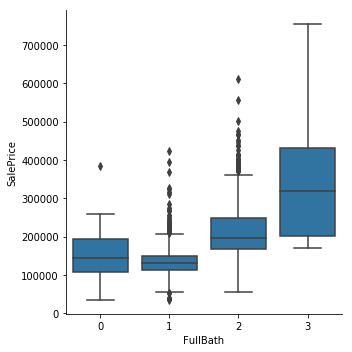

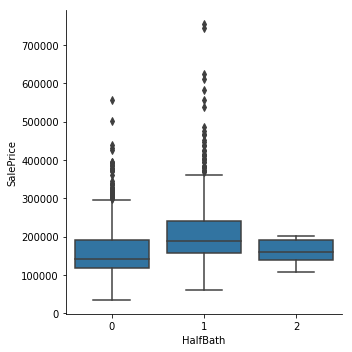

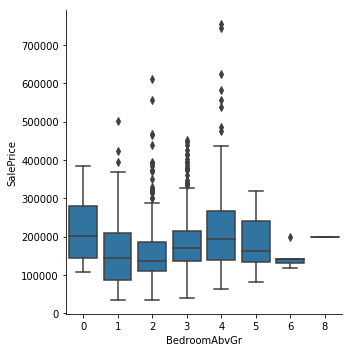

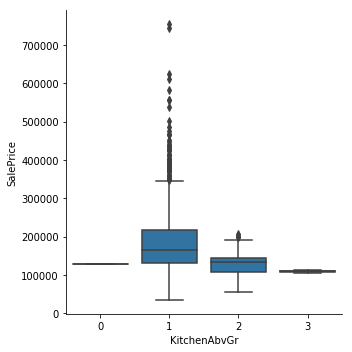

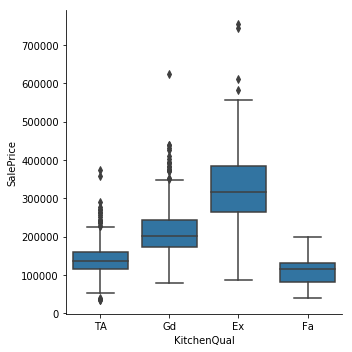

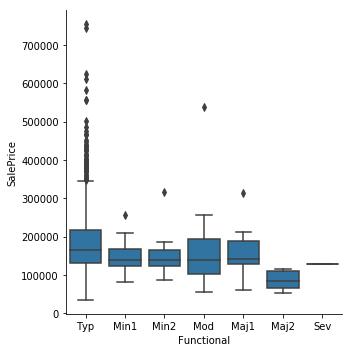

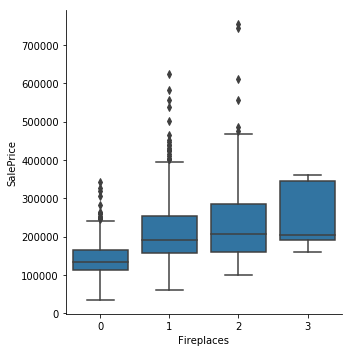

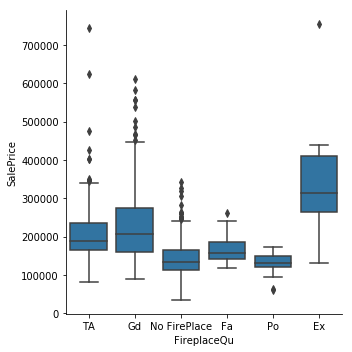

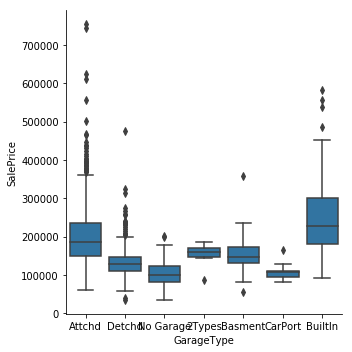

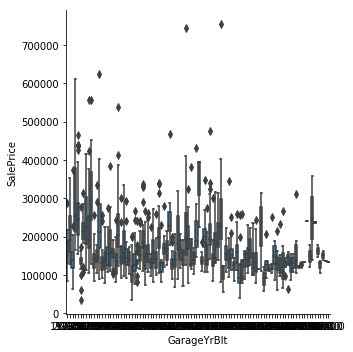

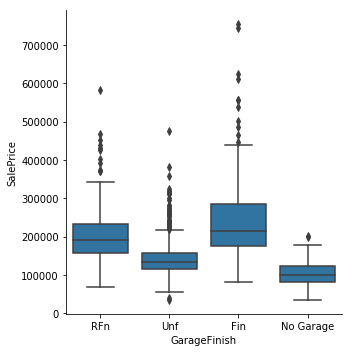

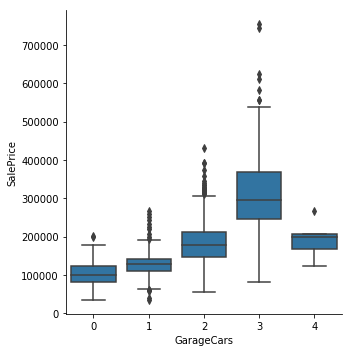

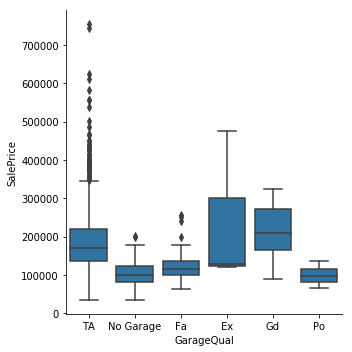

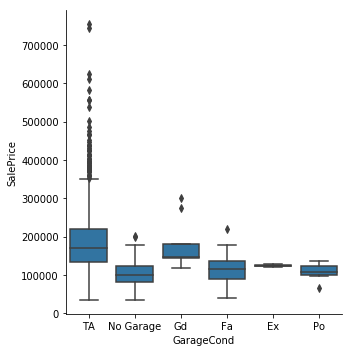

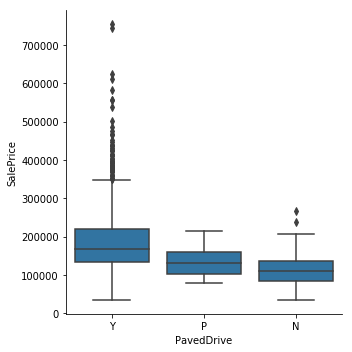

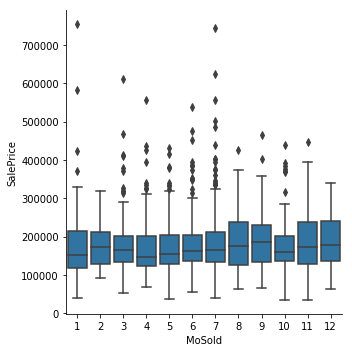

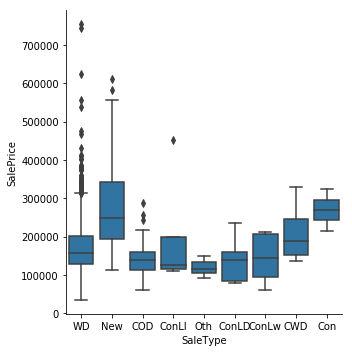

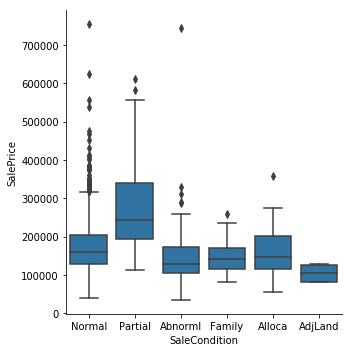

In [254]:
categorical=object_datatype(hp)
print(categorical)

for i in categorical:
    sns.FacetGrid(hp,size=5)\+
    .map(sns.boxplot,i,'SalePrice')\
    .add_legend
    plt.show()

In [314]:
pd.crosstab(index=hp['Electrical'],columns='count')
cat_dim_drop=['LandSlope','LotConfig','MoSold','GarageYrBlt','Fireplaces','Functional','KitchenAbvGr','HalfBath','BsmtHalfBath','BsmtFullBath','Electrical','OverallCond','HouseStyle','BldgType','Neighborhood','Exterior1st','Exterior2nd']
drop_column(hp,cat_dim_drop)

In [315]:
nominal=['MSZoning','Street','LandContour','Condition1','Condition2','RoofStyle','RoofMatl','MasVnrType','Foundation','Heating','CentralAir','GarageType','SaleType','SaleCondition']
ordinal=['ExterCond','LotShape','OverallQual','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','FullBath','BedroomAbvGr','KitchenQual','FireplaceQu','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive']

In [316]:
datatypecoversion(ordinal,hp,'category')
#datatypecoversion(nominal,hp,'category')

In [317]:
numeric_dimensions=numeric_datatype(hp)
numeric_dimensions

['TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice']

In [318]:
numeric_columns=hp.loc[:,numeric_dimensions]
numeric_columns.head()
numeric_col_names=numeric_columns.columns
numeric_col_names

Index(['TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice'], dtype='object')

In [241]:
from sklearn.preprocessing import StandardScaler
standard_data=StandardScaler().fit_transform(numeric_columns)
standard_data=pd.DataFrame(standard_data)
standard_data.columns=numeric_col_names
standard_data.head()
hp.drop(numeric_col_names,axis=1,inplace=True)
hp=pd.concat([hp,standard_data],axis=1)

In [319]:
hp['SalePrice']=np.log(hp['SalePrice'])
#hp['TotalBsmtSF']=np.log(hp['TotalBsmtSF'])
#hp['GrLivArea']=np.log(hp['GrLivArea'])
#hp['GarageArea']=np.log(hp['GarageArea'])

In [320]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
#lc = LabelEncoder()
encoding=defaultdict(LabelEncoder)
encoded_df=pd.DataFrame()
for i in ordinal:
    encoding[i].fit(hp[i])
    d=pd.DataFrame(encoding[i].transform(hp[i]))
    hp[i]=d
    #test_column=d.columns.values
    #list1=[i+'_'+str(j) for j in test_column]
    #d.columns=list1
    #encoded_df=pd.concat([encoded_df,d],axis=1)


In [ ]:
#http://pbpython.com/categorical-encoding.html

In [321]:
from sklearn.preprocessing import LabelBinarizer
from collections import defaultdict
import pandas as pd
encoding=defaultdict(LabelBinarizer)
encoded_df=pd.DataFrame()
for i in nominal:
    d=pd.DataFrame(encoding[i].fit_transform(hp[i]))
    test_column=d.columns.values
    list1=[i+'_'+str(j) for j in test_column]
    d.columns=list1
    encoded_df=pd.concat([encoded_df,d],axis=1)
    hp.drop(i,axis=1, inplace=True)

In [322]:
hp=pd.concat([hp,encoded_df],axis=1)

In [306]:
columns_final=hp.columns

In [163]:
hp.to_csv('PreprocessedData.csv')

In [323]:
SalePrice=hp['SalePrice']
hp.drop('SalePrice',axis=1,inplace=True)
Y=pd.DataFrame(SalePrice)
X=hp

In [324]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1234)

In [327]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)
#print('Coefficients: \n', regr.coef_)
print(regr.score(X_test,y_test))
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
#plt.plot(X_test,y_pred, color='blue', linewidth=3)
print('Root Mean Squared error:',regr.score(X_test,y_test))

0.8729927193356435
Mean squared error: 0.02
Variance score: 0.87
Root Mean Squared error: 0.8729927193356435


In [330]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, X_test, y_test, cv=5)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.08)


In [331]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, X_train, y_train, cv=5)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81 (+/- 0.11)
